In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

import requests
from io import StringIO

%matplotlib inline

sns.set(rc={'figure.figsize':(15,10)})

In [11]:
def get_data_from_url(url):
    source = requests.get(url).text
    data = StringIO(source)
    return pd.read_csv(data)

In [3]:
df_sellers = get_data_from_url('')
df_buyers = get_data_from_url('https://raw.githubusercontent.com/GabezRules/SupplyDemand_simulation/master/buyers_montecarlo.csv')

In [4]:
dummies_buyers = pd.get_dummies(df_buyers, columns=['success'])
dummies_sellers = pd.get_dummies(df_sellers, columns=['success'])

In [5]:
df_buyers_mean = dummies_buyers.groupby(['day'],as_index = False).mean()
df_sellers_mean = dummies_sellers.groupby(['day'],as_index = False).mean()

In [6]:
df_buyers_mean = dummies_buyers.groupby(['generation', 'day'],as_index = False).mean()
df_sellers_mean = dummies_sellers.groupby(['generation', 'day'],as_index = False).mean()

In [7]:
df_buyers_mean.head()

,generation,day,max_value,expected_value,success_False,success_True
0,0,1,6.2,5.620000,0.2,0.8
1,0,2,6.2,5.170000,0.4,0.6
2,0,3,6.2,5.060600,0.6,0.4
3,0,4,6.2,4.634540,0.4,0.6
4,0,5,6.2,4.434794,0.6,0.4


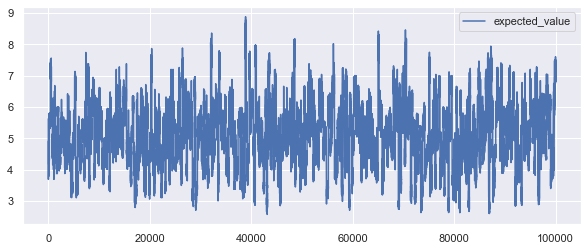

In [9]:
df_buyers_mean['expected_value'].plot(legend = True, figsize=(10,4))